In [ ]:
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense


In [ ]:
from sklearn.metrics import fbeta_score, make_scorer,r2_score,mean_absolute_error,mean_squared_error

In [ ]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [ ]:
raw_dataset.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [ ]:
raw_dataset.dropna(inplace=True)

In [ ]:
mms = MinMaxScaler()
mms.fit(raw_dataset)

raw_dataset=mms.transform(raw_dataset)
raw_dataset
df=pd.DataFrame(raw_dataset,columns=column_names)
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0
...,...,...,...,...,...,...,...,...
387,0.478723,0.2,0.186047,0.217391,0.333711,0.452381,1.0,0.0
388,0.930851,0.2,0.074935,0.032609,0.146583,0.988095,1.0,0.5
389,0.611702,0.2,0.173127,0.206522,0.193365,0.214286,1.0,0.0
390,0.505319,0.2,0.134367,0.179348,0.286929,0.630952,1.0,0.0


In [ ]:
x=df.drop(columns=['MPG'])
#x=raw_dataset.drop(columns=['MPG'])
#x.head()

In [ ]:
y=df['MPG']
type(y)
y.shape

(392,)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=20)

In [ ]:
model= Sequential()

In [ ]:
model.add(Dense(1,input_dim=7,activation='linear'))

In [ ]:
model.compile(loss='mse',optimizer='sgd', metrics='mae')

In [ ]:
from pandas.util import version
history=model.fit(x_train,y_train,epochs=500,verbose=1,validation_data=(x_test,y_test))# validation_split=0.2

Epoch 1/500
10/10 [==============================] - 1s 21ms/step - loss: 0.9514 - mae: 0.8467 - val_loss: 0.6979 - val_mae: 0.6983
Epoch 2/500
10/10 [==============================] - 0s 7ms/step - loss: 0.4770 - mae: 0.5636 - val_loss: 0.3738 - val_mae: 0.4905
Epoch 3/500
10/10 [==============================] - 0s 5ms/step - loss: 0.2713 - mae: 0.4110 - val_loss: 0.2267 - val_mae: 0.3775
Epoch 4/500
10/10 [==============================] - 0s 6ms/step - loss: 0.1774 - mae: 0.3385 - val_loss: 0.1593 - val_mae: 0.3183
Epoch 5/500
10/10 [==============================] - 0s 7ms/step - loss: 0.1337 - mae: 0.2995 - val_loss: 0.1242 - val_mae: 0.2832
Epoch 6/500
10/10 [==============================] - 0s 7ms/step - loss: 0.1102 - mae: 0.2762 - val_loss: 0.1041 - val_mae: 0.2604
Epoch 7/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0961 - mae: 0.2601 - val_loss: 0.0907 - val_mae: 0.2425
Epoch 8/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0862 - 

In [ ]:
pred=model.predict(x_test)

3/3 [==============================] - 0s 4ms/step


In [ ]:
# plt.scatter(X,Y,c='blue')
# plt.plot(X,pred,color='g')
# plt.show()

In [ ]:

...
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


Text(0.5, 1.0, 'training and val losses')

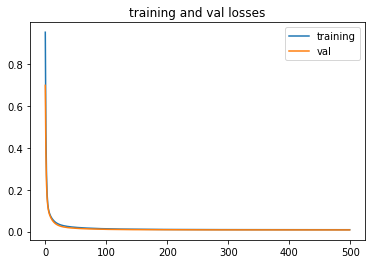

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.legend(['training','val'])
plt.title('training and val losses')

Text(0.5, 1.0, 'training and val acc')

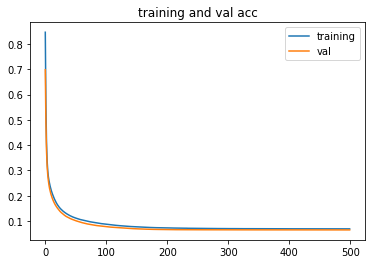

In [ ]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])

plt.legend(['training','val'])
plt.title('training and val acc')